# Mini-project: football

**Skills tested:**
- Using Pandas’ programming to read the dataset.
- Using Scikit-Learn to preprocess your data.
- Data visualization using Matplotlib.

**Description**
Football is one of the most popular sports in the world. Currently, the hype for the matches cannot be understated, and skilled players have gone beyond celebrity status! In this mini project, you will look at data collected about matches from 1872 to 2019.
License: the dataset is CC0: Public Domain and it is publicly available online.

Submission of your project on GitHub is optional. If you choose to manage your project using GitHub, find guidelines for using GitHub here. Ensure you are coding using your Jupyter Notebook – it will be uploaded to GitHub when you perform a GIT push operation.

**Expected Output**

By the end of this mini project, you will need to deliver within your code:
- The count of the tuples in the given dataset.
- The count of the names of unique tournament names from the attributes.
- The count of matches in 2018 from the attributes.
- The count of wins, losses, or draws given in the data columns.
- An output plot of the pie chart of the wins, losses, or draws.
- An output plot of the pie chart of the neutral column in the input dataset.
- The count of the names of unique team names from the attributes.

You are expected to write around 30 lines of code to complete this project.


# 1. Download the dataset

Download the dataset to your local computer in the project directory of your choice.
results.csv includes the following columns:
date - date of the match home_team - the name of the home team away_team - the name of the away team home_score - full-time home team score including extra time, not including penalty-shootouts away_score - full-time away team score including extra time, not including penalty-shootouts tournament - the name of the tournament city - the name of the city/town/administrative unit where the match was played country - the name of the country where the match was played neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue
Note on team and country names:
For home and away teams the current name of the team has been used. For example, when in 1882 a team who called themselves Ireland played against England, in this dataset, it is called Northern Ireland because the current team of Northern Ireland is the successor of the 1882 Ireland team. This is done so it is easier to track the history and statistics of teams.
For country names, the name of the country at the time of the match is used. So when Ghana played in Accra, Gold Coast in the 1950s, even though the names of the home team and the country don't match, it was a home match for Ghana. This is indicated by the neutral column, which says FALSE for those matches, meaning it was not at a neutral venue.

In [134]:
import pandas as pd

dat = pd.read_csv("results.csv")

dat 


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
42645,2021-09-09,Colombia,Chile,3,1,FIFA World Cup qualification,Barranquilla,Colombia,False
42646,2021-09-09,Paraguay,Venezuela,2,1,FIFA World Cup qualification,Asunción,Paraguay,False
42647,2021-09-09,Uruguay,Ecuador,1,0,FIFA World Cup qualification,Montevideo,Uruguay,False
42648,2021-09-09,Argentina,Bolivia,3,0,FIFA World Cup qualification,Buenos Aires,Argentina,False


What do the data look like?

In [135]:
dat.info()

dat.describe()

dat.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42650 entries, 0 to 42649
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        42650 non-null  object
 1   home_team   42650 non-null  object
 2   away_team   42650 non-null  object
 3   home_score  42650 non-null  int64 
 4   away_score  42650 non-null  int64 
 5   tournament  42650 non-null  object
 6   city        42650 non-null  object
 7   country     42650 non-null  object
 8   neutral     42650 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


date        home_team   away_team            home_score  away_score  tournament                    city            country   neutral
1872-11-30  Scotland    England              0           0           Friendly                      Glasgow         Scotland  False      1
2006-06-20  Costa Rica  Poland               1           2           FIFA World Cup                Hanover         Germany   True       1
            Paraguay    Trinidad and Tobago  2           0           FIFA World Cup                Kaiserslautern  Germany   True       1
            Sweden      England              2           2           FIFA World Cup                Cologne         Germany   True       1
2006-06-21  Iran        Angola               1           1           FIFA World Cup                Leipzig         Germany   True       1
                                                                                                                                       ..
1986-06-03  Djibouti    Ethiopia       

Let's drop any rows with missing values

In [136]:
dat = dat.dropna()

## Exploring the dataset

_How many tuples are there?_

There are 42650

In [137]:
len(dat)

42650

_How many tournaments?_

120, counting all 'friendly' matches as a tournament

In [138]:
len(dat.tournament.unique())

120

## Convert and deduce

_Convert the column date to timestamps_

In [139]:
dat['date'] = pd.to_datetime(dat['date'])

dat['date']


0       1872-11-30
1       1873-03-08
2       1874-03-07
3       1875-03-06
4       1876-03-04
           ...    
42645   2021-09-09
42646   2021-09-09
42647   2021-09-09
42648   2021-09-09
42649   2021-09-09
Name: date, Length: 42650, dtype: datetime64[ns]

_Find out how many matches were played in 2018_

908 matches were played in 2018

In [140]:
len(dat[(dat['date'] >= '2018-01-01') & (dat['date'] <= '2018-12-31')])

908

## Team statistics

_Calculate how many times the home team won, lost, or had a draw._


In [141]:
home_wins = dat[dat['home_score']>dat['away_score']]

away_wins = dat[dat['away_score']>dat['home_score']]

ties = dat[dat['away_score']>dat['home_score']]

wins = {'home':len(home_wins), 
        'away':len(away_wins),
        'tie': len(ties)}

games = len(dat)

print(wins)

{'home': 20739, 'away': 12074, 'tie': 12074}


## Visualization

_Plot the numbers extracted from Step 5 in a pie chart._

In [142]:
import matplotlib.pyplot as plt

labels = list(dict.keys(wins))

values = list(dict.values(wins))

for i in range(len(values)):
    values[i] = (values[i] / games)*100



([<matplotlib.patches.Wedge at 0x2350d9d5700>,
 [Text(0.13091470006817713, 1.0921819176794951, 'home'),
  Text(-0.9038417169652758, -0.6269530689559326, 'away'),
  Text(0.7300662615391229, -0.8228020744761703, 'tie')])

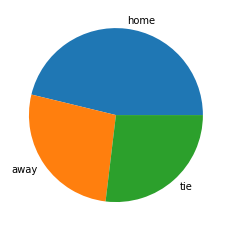

In [143]:
plt.figure()
plt.pie(x=values, labels = labels)


_Plot the neutral column as a pie chart_



<AxesSubplot:ylabel='games'>

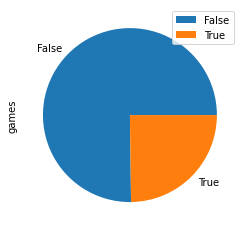

In [144]:
dat['games'] = 1

summary = dat.groupby(dat.neutral).sum()

summary.plot.pie(y = 'games')


## Unique teams

_How many unique teams are there in the dataset? Find out!_

There are 313


In [145]:
# Bind the list of home teams and away teams

home_teams = dat['home_team']

away_teams = dat['away_team']

teams = pd.concat([home_teams, away_teams])

# find the length of the unique list

len(teams.unique())


313

In [150]:
len(dat.city.unique())

dat.sort_values('date')

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,games
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1
...,...,...,...,...,...,...,...,...,...,...
42647,2021-09-09,Uruguay,Ecuador,1,0,FIFA World Cup qualification,Montevideo,Uruguay,False,1
42648,2021-09-09,Argentina,Bolivia,3,0,FIFA World Cup qualification,Buenos Aires,Argentina,False,1
42645,2021-09-09,Colombia,Chile,3,1,FIFA World Cup qualification,Barranquilla,Colombia,False,1
42646,2021-09-09,Paraguay,Venezuela,2,1,FIFA World Cup qualification,Asunción,Paraguay,False,1
